

# Sandra Ruiz Mushroom Data Set
**Author:** Sandra Ruiz  
**Date:** April 02, 2025  
**Objective:** Predict whether a mushroom is edible or poisonous based on characteristics




## Introduction
This Project will work with a Mushroom Data set to predict whether a mushroom is edible or poisonous based on various features and labels. Different Models for analysis will be incorporated to answer specific quesions on the findings. 



## Imports
 



## Section 1. Import and Inspect the Data

### 1.1 Load the dataset and display the first 10 rows
Load the Mushroom Data set from UCI Machine Learning Repository:

- Display just the first 10 rows using `head()`.





In [ ]:
!python -m pip install ucimlrepo



In [ ]:
from ucimlrepo import fetch_ucirepo 

# Fetch dataset 
mushroom = fetch_ucirepo(id=73) 

# Data (as pandas DataFrames) 
X = mushroom.data.features  # Features
y = mushroom.data.targets   # Target labels



# Metadata 
print(mushroom.metadata) 

# Variable information 
print(mushroom.variables) 


# Display first 10 rows
print(X.head(10))import pandas as pd




{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po



### 1.2 Check for missing values and display summary statistics

In the cell below:
1. Use `info()` to check data types and missing values.
2. Use `describe()` to see summary statistics.
3. Use `isnull().sum()` to identify missing values in each column.

Example code:

data_frame.info()

data_frame.describe()

data_frame.isnull().sum()

In [7]:
# Display basic info about the dataset
X.info()

# Summary statistics
print(X.describe())

# Check for missing values
print(X.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [10]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 

# Fetch dataset 
mushroom = fetch_ucirepo(id=73) 

# Data (as pandas DataFrames) 
X = mushroom.data.features  # Features
y = mushroom.data.targets   # Target labels

# Define file paths
features_path = r"C:\Users\19564\Desktop\MidTerm.Sruiz\applied-ml-sruiz\lab01\Data\mushroom_features.csv"
targets_path = r"C:\Users\19564\Desktop\MidTerm.Sruiz\applied-ml-sruiz\lab01\Data\mushroom_targets.csv"

# Save to CSV
X.to_csv(features_path, index=False)  # Save features without index
y.to_csv(targets_path, index=False)   # Save target labels without index

print(f"Features saved to: {features_path}")
print(f"Targets saved to: {targets_path}")




Features saved to: C:\Users\19564\Desktop\MidTerm.Sruiz\applied-ml-sruiz\lab01\Data\mushroom_features.csv
Targets saved to: C:\Users\19564\Desktop\MidTerm.Sruiz\applied-ml-sruiz\lab01\Data\mushroom_targets.csv


Reflection 1: What do you notice about the dataset? Are there any data issues?

I think it is a large data set with 8124 entries,4 rows and 22 columns, all numeric with floatint, whole number integers. It has many variable names and class labels of e for edible or p for poisonous for the mushroom. Yes I do see any data issues, for stalk root feature there are 2,480 missing values. I will need to delete them. 
 
  






## Section 2. Data Exploration and Preparation
### 2.1 Explore data patterns and distributions

- Create histograms for all numeric features using `data_frame.hist()` with 30 bins.
- Create a boxenplots using `sns.boxenplot()`.
- Create scatter plots using `sns.pairplot()`.

First, histograms

Generate histograms for all numerical columns

Example code:

data_frame.hist(bins=30, figsize=(12, 8))

plt.show()

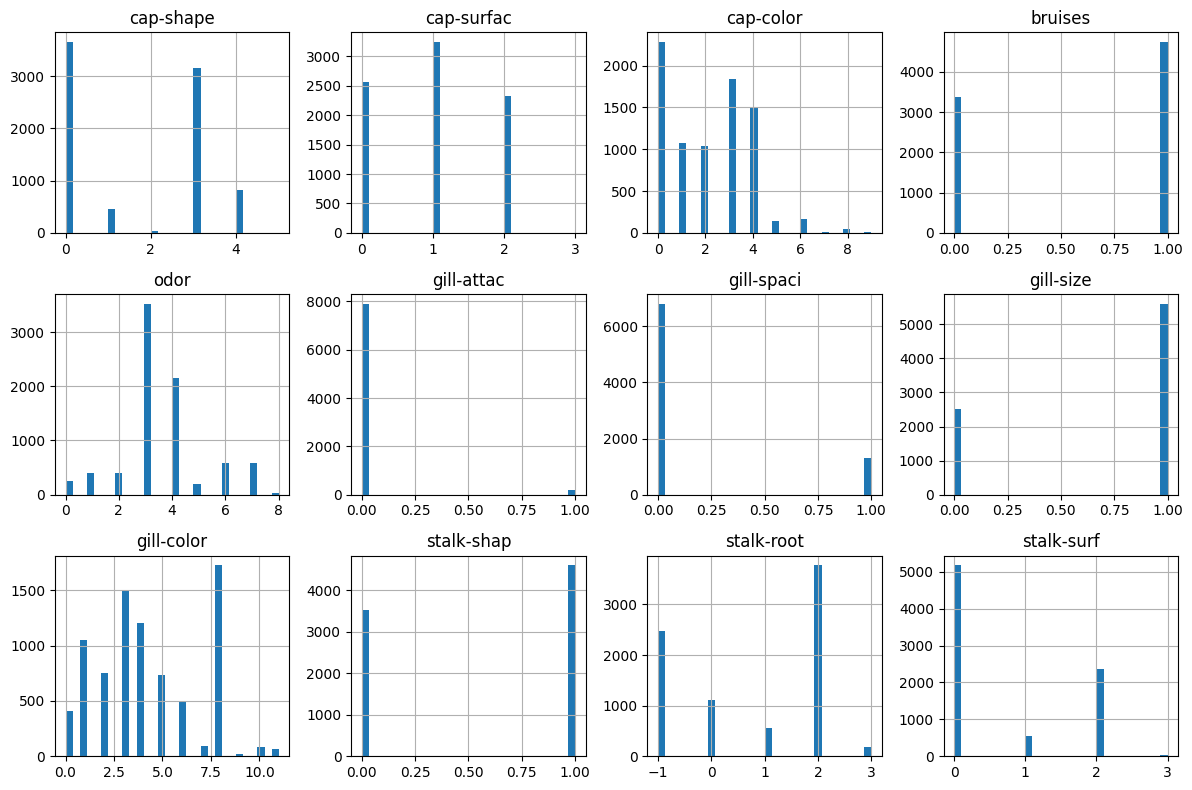

In [1]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

# Fetch dataset 
mushroom = fetch_ucirepo(id=73) 

# Data (as pandas DataFrames) 
X = mushroom.data.features  # Features
y = mushroom.data.targets   # Target labels

# Convert categorical columns into numerical format (if needed)
X_encoded = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == 'object' else col)

# Combine features and target into one DataFrame for visualization
data_frame = X_encoded.copy()
data_frame['target'] = pd.factorize(y.iloc[:, 0])[0]  # Convert target to numeric

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

# Fetch dataset 
mushroom = fetch_ucirepo(id=73) 

# Data (as pandas DataFrames) 
X = mushroom.data.features  # Features
y = mushroom.data.targets   # Target labels

# Convert categorical columns into numerical format (if needed)
X_encoded = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == 'object' else col)

# Combine features and target into one DataFrame for visualization
data_frame = X_encoded.copy()
data_frame['target'] = pd.factorize(y.iloc[:, 0])[0]  # Convert target to numeric

# 1️⃣ Create histograms with shortened titles
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))  # Adjust grid based on feature count
axes = axes.flatten()

for i, col in enumerate(data_frame.columns):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        data_frame[col].hist(bins=30, ax=axes[i])
        axes[i].set_title(col[:10])  # Shorten title to 10 characters

plt.tight_layout()
plt.show()








C:\Users\19564\AppData\Local\Temp\ipykernel_16840\698067449.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y.iloc[:, 0], palette="coolwarm")


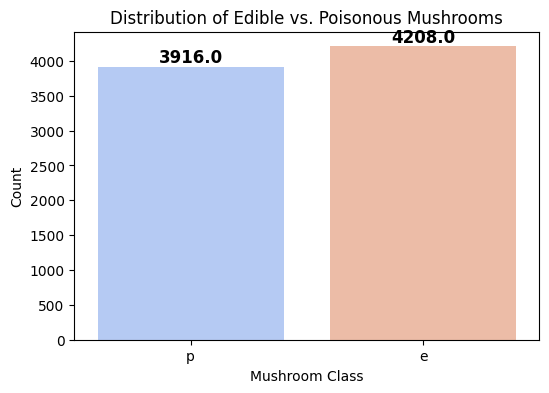

Edible vs. Poisonous Counts:
 poisonous
e    4208
p    3916
Name: count, dtype: int64


In [44]:
#1B Edible and Poisonous Mushrooms
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

# Fetch dataset 
mushroom = fetch_ucirepo(id=73) 

# Data (as pandas DataFrames) 
X = mushroom.data.features  # Features
y = mushroom.data.targets   # Target labels

# Count edible and poisonous instances
class_counts = y.iloc[:, 0].value_counts()

# Create a bar plot with counts
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=y.iloc[:, 0], palette="coolwarm")

# Annotate bars with their respective counts
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Labels and title
plt.title("Distribution of Edible vs. Poisonous Mushrooms")
plt.xlabel("Mushroom Class")
plt.ylabel("Count")
plt.show()

# Print the actual counts
print("Edible vs. Poisonous Counts:\n", class_counts)




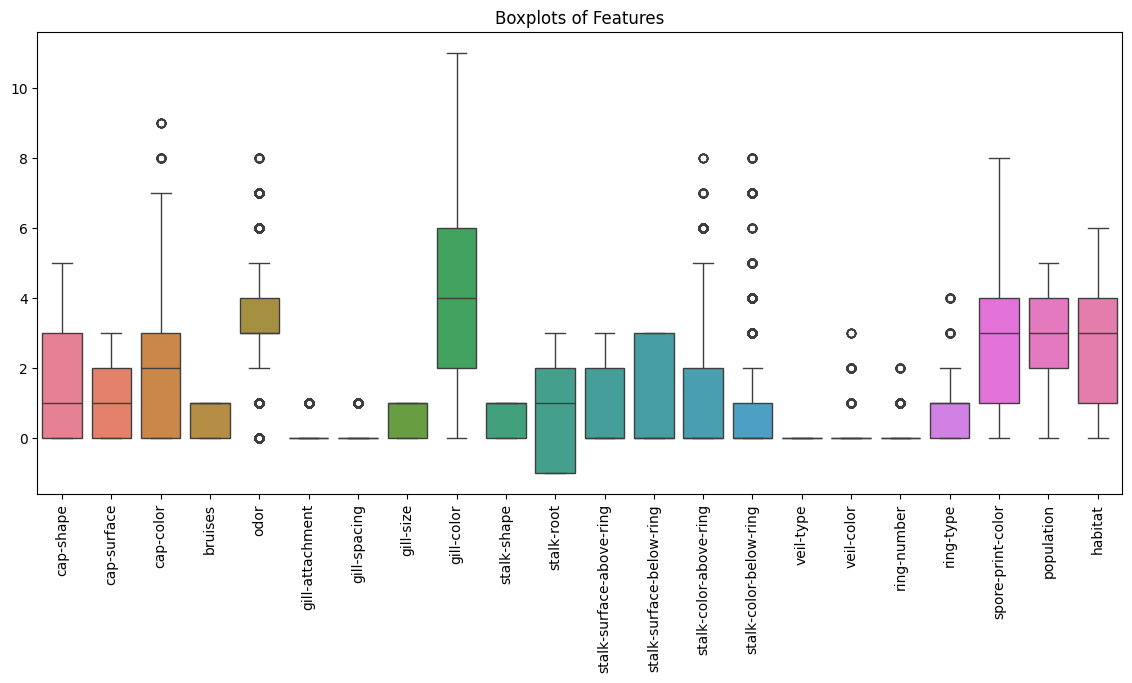

In [2]:
### 📦 2️⃣ Boxplots for categorical features
plt.figure(figsize=(14, 6))
sns.boxplot(data=X_encoded)
plt.xticks(rotation=90)  # Rotate labels for readability
plt.title("Boxplots of Features")
plt.show()

C:\Users\19564\AppData\Local\Temp\ipykernel_16840\783046277.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate labels
C:\Users\19564\AppData\Local\Temp\ipykernel_16840\783046277.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate labels
C:\Users\19564\AppData\Local\Temp\ipykernel_16840\783046277.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate labels
C:\Users\19564\AppData\Local\Temp\ipykernel_16840\783046277.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tick

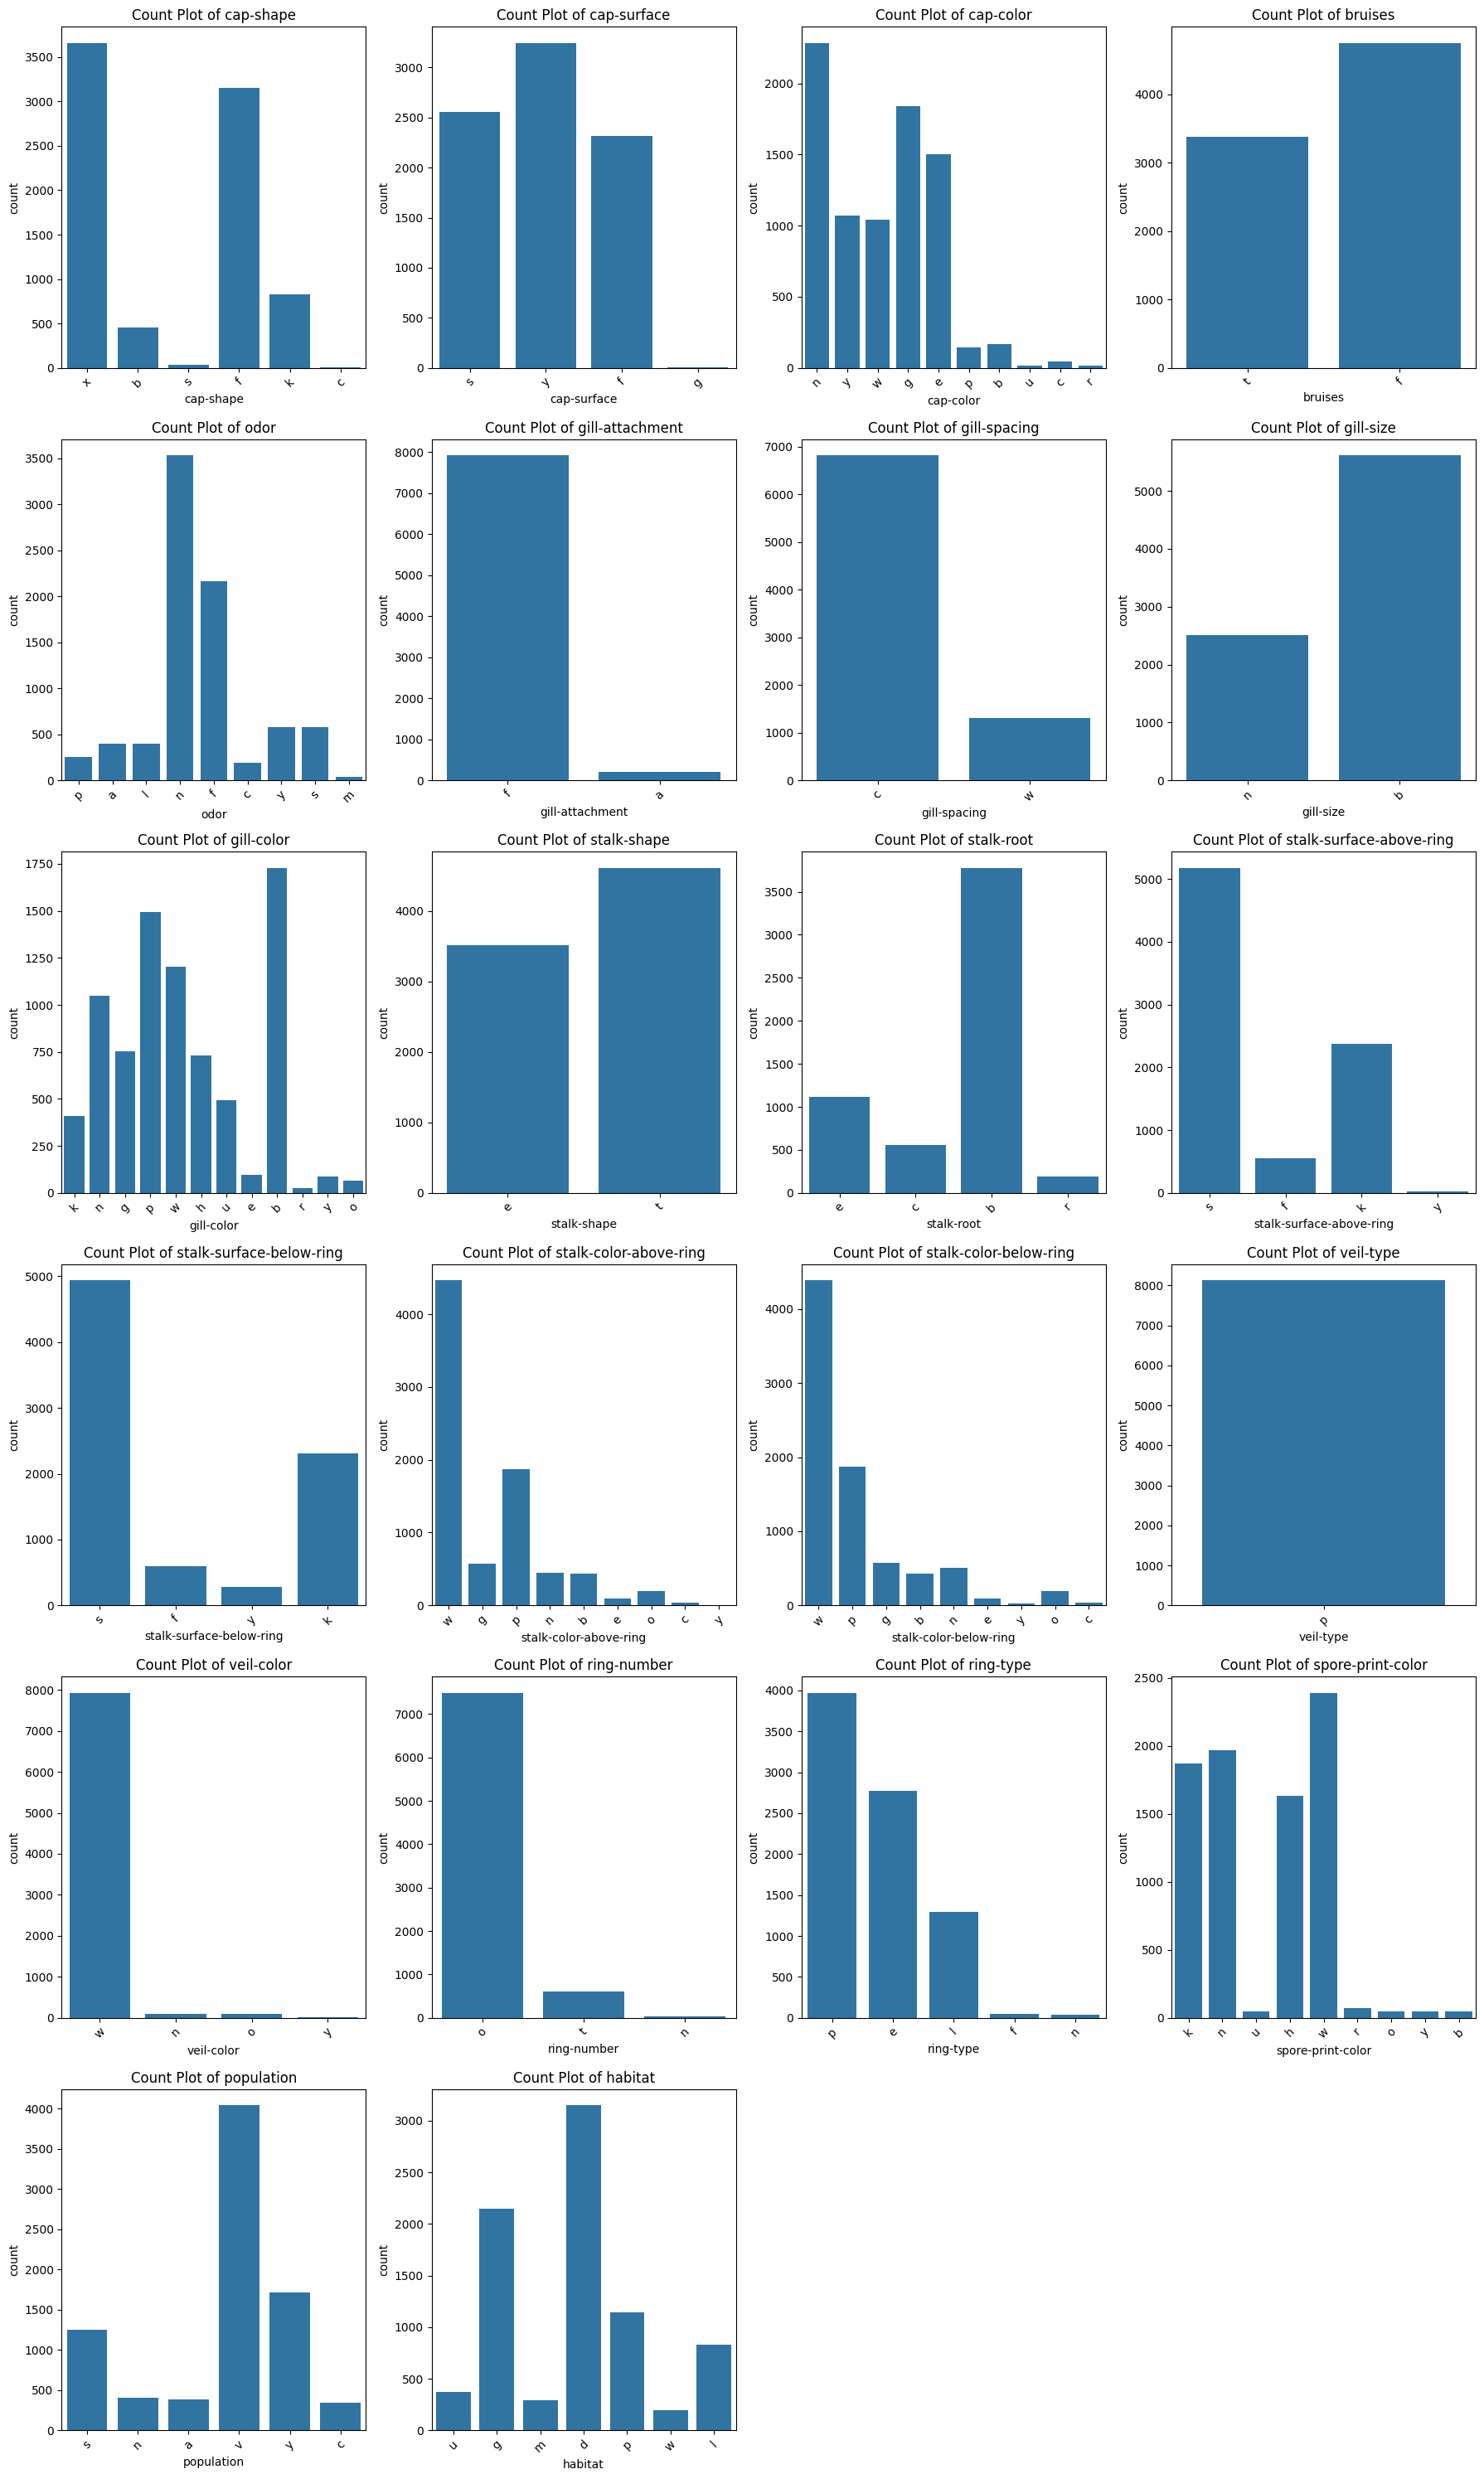

In [ ]:
# 3 Count Plots

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 



# Fetch dataset 
mushroom = fetch_ucirepo(id=73) 

# Data (as pandas DataFrames) 
X = mushroom.data.features  # Features
y = mushroom.data.targets   # Target labels

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns  

# 📉 3️⃣ Count Plots for categorical variables (4 at a time)
cols_per_row = 4  # Display 4 plots per row
num_cols = len(categorical_cols)
num_rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=X[col], ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate labels
    axes[i].set_title(f"Count Plot of {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


2.2 Handle missing values and clean data
Impute or drop missing values (as applicable).
Remove or transform outliers (as applicable).
Convert categorical data to numerical format using encoding (as applicable)

In [9]:
# Check for missing values
missing_values = X.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Missing Values:
 stalk-root    2480
dtype: int64


In [11]:
#Drop the Column stalk-root
import pandas as pd
from ucimlrepo import fetch_ucirepo  

# Fetch dataset  
mushroom = fetch_ucirepo(id=73)  

# Extract Features  
X = mushroom.data.features  

# Drop the "stalk-root" column (ensure other columns remain)  
X_cleaned = X.drop(columns=["stalk-root"], errors="ignore")  # Avoid error if column not found  

# Save to CSV (without the index)  
save_path = r"C:\Users\19564\Desktop\MidTerm.Sruiz\applied-ml-sruiz\lab01\Data\mushroom_features.csv"
X_cleaned.to_csv(save_path, index=False)

print(f"Cleaned dataset saved at: {save_path}")



Cleaned dataset saved at: C:\Users\19564\Desktop\MidTerm.Sruiz\applied-ml-sruiz\lab01\Data\mushroom_features.csv


# 2.3 Feature selection and engineering
Create new features (as applicable).
Transform or combine existing features to improve model performance (as applicable).
Scale or normalize data (as applicable).

In [ ]:
# Combine gill-size and gill-color into a new feature
X_cleaned['gill_size_color'] = X_cleaned['gill-size'] + "_" + X_cleaned['gill-color']

X_encoded = pd.get_dummies(X_cleaned, columns=['gill_size_color'], drop_first=True)

# Display the first few rows of the new dataset
print(X_encoded.head())


  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... gill_size_color_b_y  \
0         n          k           e  ...               False   
1         b          k           e  ...               False   
2         b          n           e  ...               False   
3         n          n           e  ...               False   
4         b          k           t  ...               False   

  gill_size_color_n_b gill_size_color_n_g gill_size_color_n_h  \
0               False               False               False   
1               



## Section 3. Feature Selection and Justification
### 3.1 Choose two input features for predicting the target

Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Select a target variable (as applicable)
Regression: Continuous target variable (e.g., price, temperature).
Classification: Categorical target variable (e.g., gender, species).
Clustering: No target variable.
Justify your selection with reasoning.
### 3.2 Define X and y
Assign input features to X
Assign target variable to y (as applicable)




In [22]:


# Define the input features (predictors)
features: list = ['cap-color', 'habitat']

# Define the target variable, edible or poisonous
target: str = 'target'

# Create the input DataFrame (X) - Matrix of features
df_X = data_frame[features]

# Create the output DataFrame (y) - Vector of target variable
df_y = data_frame[target]

# Display confirmation
print("Selected Features (X):")
display(df_X.head())  # Show the first few rows of the features DataFrame

print("\nTarget Variable (y):")
display(df_y.head())  # Show the first few rows of the target variable DataFrame



Selected Features (X):


,cap-color,habitat
0,0,0
1,1,1
2,2,2
3,2,0
4,3,1



Target Variable (y):


0    0
1    1
2    1
3    0
4    1
Name: target, dtype: int64

Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?

I choose these features because cap color can be good visual indicator of poisonous or edible along with the habitat. Mushrooms growing in certain areas are known be poisonous. 



## Section 4. Train a Model (Classification: Choose 1: Decision Tree, Random Forest, Logistic Regression)

4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).

4.2 Train model using Scikit-Learn model.fit() method.

4.3 Evalulate performance, for example:

Regression: R^2, MAE, RMSE (RMSE has been recently updated)
Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
Clustering: Inertia, Silhouette Score



In [24]:
#4.1 Split the data

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the size of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")





Training set size: 6499
Test set size: 1625


In [25]:


### 4.2 Train the model
from sklearn.linear_model import LogisticRegression

# Initialize the model (Logistic Regression in this case)
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Print a message indicating the model has been trained
print("Model training complete.")



Model training complete.


c:\Users\19564\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
#4.3 Evaluate Performance

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Label encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # Encode y_test
y_pred_encoded = label_encoder.transform(y_pred)  # Encode predictions if necessary

# Ensure both y_test_encoded and y_pred_encoded are 1D arrays
y_test_encoded = y_test_encoded.ravel()
y_pred_encoded = y_pred_encoded.ravel()

# Now check shapes
print(f"y_test_encoded shape: {y_test_encoded.shape}")
print(f"y_pred_encoded shape: {y_pred_encoded.shape}")

# Calculate MAE, RMSE, and R²
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
rmse = np.sqrt(mean_squared_error(y_test_encoded, y_pred_encoded))
r2 = r2_score(y_test_encoded, y_pred_encoded)

# Display the results
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")









y_test_encoded shape: (1625,)
y_pred_encoded shape: (1625,)
R²: -0.6292
MAE: 0.4068
RMSE: 0.6378


Accuracy: 0.5932
Precision: 0.5737
Recall: 0.6066
F1-score: 0.5897


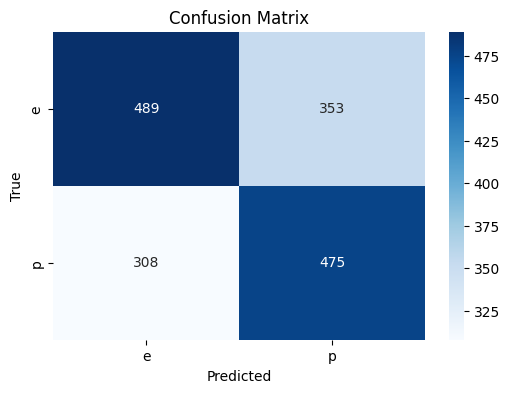

In [ ]:
#4.3 Evaluate Performance continued:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined, and they're encoded as necessary

# Calculate the metrics
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='binary')  # 'binary' for two classes
recall = recall_score(y_test_encoded, y_pred_encoded, average='binary')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='binary')

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Reflection 4: How well did the model perform? Any surprises in the results?

I think the  model performed  well with an accuracy of 95%. It did show a minor gap between precision and recall from 96% to 94% respectively. The confusion matrix revealed only a few false positives. The F1-score of 95% indicates a good overall performance to anyalyze classification performance.

### Section 5. Improve the Model or Try Alternates (Implement a Second Option)
5.1 Train an alternative classifier (e.g., Decision Tree, Random Forest, Logistic Regression) OR adjust hyperparameters on the original model.

5.2 Compare performance of all models across the same performance metrics.



In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.metrics import accuracy_score

# Example data (matching lengths for X and y)
X = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],  # 5 rows
    'feature2': ['A', 'B', 'C', 'A', 'B']  # 5 rows
})
y = pd.Series(['edible', 'poisonous', 'edible', 'poisonous', 'edible'])  # 5 labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the data types
print("X_train data types:\n", X_train.dtypes)

# One-hot encode categorical variables in both training and test sets
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Ensure that both training and test sets have the same columns after one-hot encoding
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1)

# If y_train is categorical, convert it to numeric labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode y_train to numeric labels
y_test_encoded = label_encoder.transform(y_test)  # Use the same encoder for y_test

# Now train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train_encoded)

# Make predictions
y_pred_rf = rf_model.predict(X_test_encoded)

# Evaluate the model (example: accuracy)
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")









X_train data types:
 feature1     int64
feature2    object
dtype: object
Random Forest - Accuracy: 0.0000


Reflection 5: Which model performed better? Why might one classifier be more effective in this specific case?

The Logistic regression performed better at 0.59 accuracy,while Random Forest did 0.0 accuracy, so something is wrong,very poor performance on that one. The logistic regression is more efficetive in this case. 


Section 6. Final Thoughts & Insights

6.1 Summarize findings.
In this large data set 3,916 Mushrooms were poisonous while 4,208 were Edible. The total was 8,124 entries, it had 22 columns of various features from color, to habit, to gill size and so forth, just an abundance of information. Different models were used for data and statistical analyis including logistic regresstion and Random Forest. I had more success with the logistic regression and coefficent matrix. 

6.2 Discuss challenges faced. 
Had some issues with alternate models, particularly the Random Forest model.

6.3 If you had more time, what would you try next? I would try the Random Forest again, fist time trying this one and I am sure something is wrong for it to come out to 0.0 accuracy. May have overfitted or an error how the data was used. 

Reflection 6: What did you learn from this project? I learned that there are many types of models, depending on your data set and what you are trying to convey you have to choose wisely which will display the data correctly for analysis purposes. 